In [733]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression, make_classification
from ipywidgets import interactive
import ipywidgets as widgets

%matplotlib inline

# Supervised Learning

## Linear Regression -- rather informal introduction

The code below is based in part on Andrew Ng deep learning classes on Coursera. 

Let us make a synthetic dataset of house sale price based on number of bedrooms, sq. footage, and year built:

[105300, 110300, 115300, 120300, 125300, 130300, 135300, 140300, 145300, 150300, 155300, 160300, 165300, 170300, 175300]


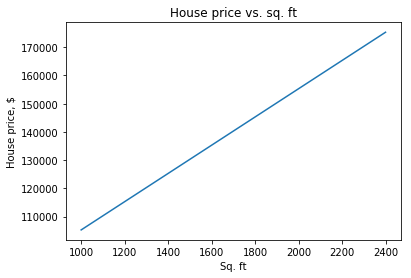

In [734]:
# x1 -- number of bedrooms in a house
# x2 -- sq. ft
# x3 -- year built
W = (15000, 50, -10)
b = 30000

def predict(x1,x2,x3,W,b):
    return W[0]*x1+W[1]*x2+W[2]*x3+b

y_pred = []

for x2 in range(1000,2500,100):
    y_pred.append(predict(3,x2,1970,W,b))

print(y_pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(np.arange(1000,2500,100), y_pred, )
ax.set_xlabel('Sq. ft')
ax.set_ylabel('House price, \$')
ax.set_title('House price vs. sq. ft')

In [735]:
# Figure out the w1-w3 and b that make the most sense according to your intuition

## Advertising dataset

This is a more realistic dataset of sales based on advertising on TV, Radio, and newspaper:

In [736]:
df = pd.read_csv('./data/Advertising.csv')
X = df.TV
y = df.Sales

def linear_fit(w1, b):
    y_pred = w1*X+b
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X, y_pred, label = 'Linear regression (predicted)', color = 'r')
    ax.scatter(X, y, label = 'Sales')
    ax.set_xlabel('TV')
    ax.set_ylabel('Sales')
    ax.legend()
    plt.show()
    
i_plot = interactive(linear_fit, w1 = (0.0,0.1,0.01), b = (0.0,10.0))
i_plot

interactive(children=(FloatSlider(value=0.05, description='w1', max=0.1, step=0.01), FloatSlider(value=5.0, de…

How good is the linear regression? Let us compute the loss and the cost:

Loss is the squared error between the predicted $\hat{y}^{(i)}$ and true data $y^{(i)}$ for row $i$:

$L(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2$

Cost -- is the average of losses at each point. Here, the cost is proportional to Mean Squared Error (MSE): 

$J = \frac{1}{m}\sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)})$

So, let's try again and minimize the cost:

In [737]:
def linear_fit(w1, b):
    y_pred = w1*X+b
    Loss = (y-y_pred)**2
    Cost = np.mean(Loss)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X, y_pred, label = 'Linear regression (predicted)', color = 'r')
    ax.scatter(X, y, label = 'Sales')
    ax.set_xlabel('TV')
    ax.set_ylabel('Sales')
    
    ax.set_title('Cost $J$= %.2f'%Cost)
    ax.legend()
    plt.show()
    
i_plot = interactive(linear_fit, w1 = (0.0,0.1,0.005), b = (0.0,10.0))
i_plot

interactive(children=(FloatSlider(value=0.05, description='w1', max=0.1, step=0.005), FloatSlider(value=5.0, d…

## Linear Regression -- a little more formal intro

### Notation

$x^{(i)}$ -- Input i, vector of shape (num_features, 1)

$y^{(i)}$, $\hat{y}^{(i)}$ -- output i and predicted output i, vectors of shape (1,1)

$W$ -- weights vector of shape (num_features, 1)

$b$ -- b coefficient


### Forward propagation

$\hat{y}^{(i)} = W^Tx^{(i)}+b$

### Loss function

$L(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2$

### Cost

$J = \frac{1}{m}\sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)})$

### Backward propagation

$d\hat{y}^{(i)} = \frac{\partial L}{\partial \hat{y}^{(i)}} = \left(\hat{y}^{(i)} - y^{(i)}\right)$

$dW^{(i)} = \frac{\partial L}{\partial W^{(i)}} = d\hat{y}^{(i)} x^{(i)}$

$db^{(i)} = d\hat{y}^{(i)}$

### Update equations

$dW = \frac{1}{m} \sum_{i=1}^{m} dW^{(i)}$

$db = \frac{1}{m} \sum_{i=1}^{m} db^{(i)}$

$W_{t+1} = W_{t} - \alpha dW$

$b_{t+1} = b_{t} - \alpha db$

where $\alpha$ -- learning rate

Let us test the above equations on synthetic data: 

In [738]:
# Make a synthetic dataset
X, y = make_regression(n_features = 2, random_state = 10)

X = X.T
X.shape

(2, 100)

X is a stack of 2-dimensional vectors (a matrix). See what the data looks like:

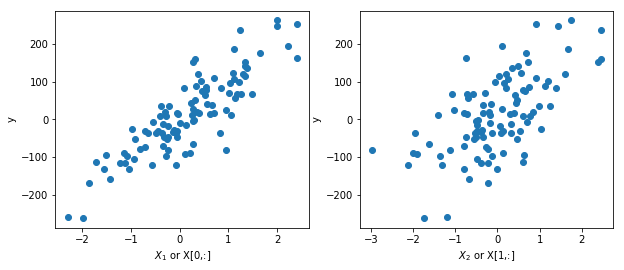

In [739]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(X[0,:],y)
ax.set_xlabel('$X_1$ or X[0,:]')
ax.set_ylabel('y')
ax = fig.add_subplot(1,2,2)
ax.scatter(X[1,:],y)
ax.set_xlabel('$X_2$ or X[1,:]')
ax.set_ylabel('y')
plt.show()

### Initialize linear regression

At this point, all model parameters ($W$ and $b$) are initialized. In case of linear regression, they can all be set to 0's:

In [740]:
# Initialize model parameters
def initialize_with_zeros(dim):
    W = np.zeros(shape=(dim, 1))
    b = 0
    return W,b

W,b = initialize_with_zeros(2)
print('W:',W)
print('b:',b)

W: [[ 0.]
 [ 0.]]
b: 0


### Propagate

For given model parameters $W$ and $b$ as well as the data $X$ and $y$, run forward and backward propagations to compute:

$\hat{y}$, $J$, $\frac{\partial J}{\partial \hat{y}}$, $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial b}$. 

The last two are the gradients that the function returns:

In [741]:
# Propagation function
def propagate(W, b, X, y):
    # Forward propagation
    y_hat = np.dot(np.transpose(W),X)+b
    cost = np.mean(0.5*(y-y_hat)**2)
    
    # Backward propagation
    dy_hat = y_hat-y
    
    dW = np.mean(dy_hat*X, axis = 1, keepdims = True)
    db = np.mean(dy_hat)
    
    grads = {'dW':dW,'db':db}
    return grads, cost

W,b = initialize_with_zeros(X.shape[0])
grads,cost = propagate(W,b,X,y)
print(grads,cost)

{'dW': array([[-88.55315301],
       [-63.33512097]]), 'db': -13.103991362317949} 5443.86506746


### Apply gradient descent to model parameters

Now, that we have the function to compute the gradients, apply these to $W$ and $b$:

In [742]:
# Apply gradient descent to find model parameters 

def optimize(W,b,X,y,num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(W,b,X,y)
        dW, db = grads['dW'], grads['db']
        
        W = W - learning_rate*dW
        b = b - learning_rate*db
        
        costs.append(cost)
        
        if print_cost and i%10 == 0:
            print("Cost after iteration %d: %.2f"%(i,cost))
            
    params = {'W':W,'b':b}
    grads = {'dW':dW,'db':db}
        
    return params, grads, costs

params, grads, costs = optimize(W,b,X,y,num_iterations = 100, learning_rate = 0.1, print_cost = True)


Cost after iteration 0: 5443.87
Cost after iteration 10: 548.41
Cost after iteration 20: 62.43
Cost after iteration 30: 8.29
Cost after iteration 40: 1.29
Cost after iteration 50: 0.23
Cost after iteration 60: 0.04
Cost after iteration 70: 0.01
Cost after iteration 80: 0.00
Cost after iteration 90: 0.00


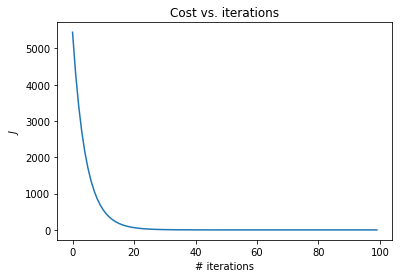

In [743]:
# Let's see how the cost function is changing
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(costs)
ax.set_ylabel('$J$')
ax.set_xlabel('# iterations')
ax.set_title('Cost vs. iterations')
plt.show()

### Predict function

This function computes $\hat{y}$ based on $X$ and model parameters: 

In [744]:
# Predict
def predict(W,b,X):
    y_pred = np.dot(W.T,X)+b
    return y_pred
    
y_pred = predict(params['W'],params['b'],X)

### Linear Regression Model function

Finally, model function uses the code above to put everything together:

In [745]:
# Linear regression model

def model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 0.1, print_cost = False):
    # Initialize the model
    num_features = X_train.shape[0]
    W,b = initialize_with_zeros(num_features)
    
    # Fit the model
    params, grads, costs = optimize(W,b,X_train,y_train,num_iterations, learning_rate, print_cost)
    
    # Run predictions on the train and test datasets
    W,b = params['W'], params['b']
    y_pred_test = predict(W,b,X_test)
    y_pred_train = predict(W,b,X_train)

    print("Train mean squared error: %.3f" % (np.mean((y_pred_train-y_train)**2)))
    print("Test mean squared error: %.3f" % (np.mean((y_pred_test-y_test)**2)))
    
    d = {'costs': costs,
        'y_pred_test':y_pred_test,
        'y_pred_train':y_pred_train,
        'W':W, 'b':b,
        'learning_rate':learning_rate,'num_iterations':num_iterations}
    return d
    
X_train, X_test = X[:,:70],X[:,70:] 
y_train, y_test = y[:70],y[70:] 
d = model(X_train,y_train,X_test,y_test, num_iterations = 100, print_cost = True, learning_rate = 0.1)

Cost after iteration 0: 5796.42
Cost after iteration 10: 500.03
Cost after iteration 20: 54.38
Cost after iteration 30: 8.12
Cost after iteration 40: 1.61
Cost after iteration 50: 0.38
Cost after iteration 60: 0.10
Cost after iteration 70: 0.03
Cost after iteration 80: 0.01
Cost after iteration 90: 0.00
Train mean squared error: 0.001
Test mean squared error: 0.002


How does the model do on the test data?

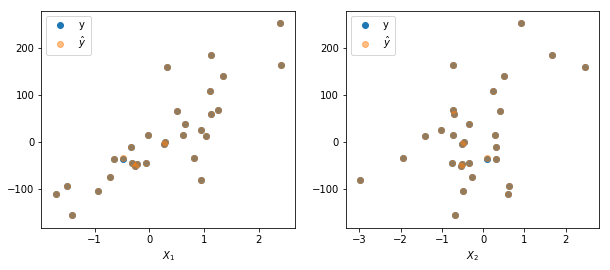

In [746]:
# Let's see how the model is doing on the test data
y_pred_test = d['y_pred_test']
plt.figure(figsize = (10,4))
ax = plt.subplot(121)
ax.scatter(X_test[0,:],y_test, label = 'y')
ax.scatter(X_test[0,:],y_pred_test, label = '$\hat{y}$',alpha = 0.5)
ax.set_xlabel('$X_1$')
ax.legend()
ax = plt.subplot(122)
ax.scatter(X_test[1,:],y_test, label = 'y')
ax.scatter(X_test[1,:],y_pred_test, label = '$\hat{y}$', alpha = 0.5)
ax.set_xlabel('$X_2$')
ax.legend()
plt.show()

Try to get a better model by:

* Changing num_iterations
* Changing learning_rate

Explain the model: What do W's and b mean? How can this model be expressed as an equation? Write model equations, using $$

## Advertising dataset
Apply Linear regression to predict sales based on TV, Radio, and Newspaper in Advertising dataset:

In [747]:
# Use linear regression to predict the amount of sales in the Advertising dataset. What is the model error? 
# Express the model as above
df = pd.read_csv("./data/Advertising.csv")
df.head()
X = np.asarray(df[['TV','Radio','Newspaper']]).T # transform the data
y = np.asarray(df['Sales']).reshape([1,-1]) # transform the outputs
X_train, X_test = X[:,:160],X[:,160:] 
y_train, y_test = y[:,:160],y[:,160:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3, 160), (3, 40), (1, 160), (1, 40))

In [748]:
# Try to model the data with the model function
d = model(X_train,y_train,X_test,y_test, num_iterations = 2000, print_cost = True, learning_rate = 0.00001)

Cost after iteration 0: 112.49
Cost after iteration 10: 8.82
Cost after iteration 20: 7.99
Cost after iteration 30: 7.36
Cost after iteration 40: 6.83
Cost after iteration 50: 6.36
Cost after iteration 60: 5.97
Cost after iteration 70: 5.62
Cost after iteration 80: 5.32
Cost after iteration 90: 5.06
Cost after iteration 100: 4.83
Cost after iteration 110: 4.63
Cost after iteration 120: 4.45
Cost after iteration 130: 4.29
Cost after iteration 140: 4.15
Cost after iteration 150: 4.02
Cost after iteration 160: 3.91
Cost after iteration 170: 3.81
Cost after iteration 180: 3.71
Cost after iteration 190: 3.63
Cost after iteration 200: 3.55
Cost after iteration 210: 3.48
Cost after iteration 220: 3.41
Cost after iteration 230: 3.35
Cost after iteration 240: 3.29
Cost after iteration 250: 3.24
Cost after iteration 260: 3.19
Cost after iteration 270: 3.14
Cost after iteration 280: 3.09
Cost after iteration 290: 3.05
Cost after iteration 300: 3.01
Cost after iteration 310: 2.97
Cost after iterat

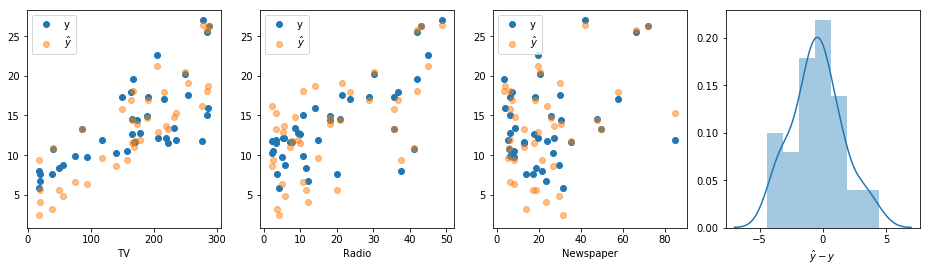

In [749]:
# Let's see how the model is doing on the test data
y_pred_test = d['y_pred_test']
plt.figure(figsize = (16,4))
ax = plt.subplot(141)
ax.scatter(X_test[0,:],y_test, label = 'y')
ax.scatter(X_test[0,:],y_pred_test, label = '$\hat{y}$',alpha = 0.5)
ax.set_xlabel('TV')
ax.legend()
ax = plt.subplot(142)
ax.scatter(X_test[1,:],y_test, label = 'y')
ax.scatter(X_test[1,:],y_pred_test, label = '$\hat{y}$', alpha = 0.5)
ax.set_xlabel('Radio')
ax.legend()
ax = plt.subplot(143)
ax.scatter(X_test[2,:],y_test, label = 'y')
ax.scatter(X_test[2,:],y_pred_test, label = '$\hat{y}$', alpha = 0.5)
ax.set_xlabel('Newspaper')
ax.legend()
ax = plt.subplot(144)
sns.distplot(y_pred_test-y_test, ax = ax)
ax.set_xlabel('$\hat{y}-y$')
plt.show()

## AMZN: Using Linear Regression to forecast time series

In [750]:
df = pd.read_csv('./data/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


Let us take the data from two days prior to the current as X and current closing as y:

In [751]:
df = pd.read_csv('./data/AMZN.csv')

df_past1 = df.iloc[:-2,[1,4]].values
df_past2 = df.iloc[1:-1,[1,4]].values
df_curr = df.iloc[2:,[1,4]].values

df_regression = pd.DataFrame({
    'Open_1':df_past1[:,0],
    'Open_2':df_past2[:,0],
    'Open_cur':df_curr[:,0],
    'Close_1':df_past1[:,1],
    'Close_2':df_past2[:,1],
    'Close_cur':df_curr[:,1]
})

df_regression.head()

,Close_1,Close_2,Close_cur,Open_1,Open_2,Open_cur
0,1.958333,1.729167,1.708333,2.437500,1.968750,1.760417
1,1.729167,1.708333,1.635417,1.968750,1.760417,1.729167
2,1.708333,1.635417,1.427083,1.760417,1.729167,1.635417
3,1.635417,1.427083,1.395833,1.729167,1.635417,1.437500
4,1.427083,1.395833,1.500000,1.635417,1.437500,1.406250


In [752]:
X = np.asarray(df_regression[['Open_1', 'Open_2', 'Open_cur', 'Close_1', 'Close_2']]).T
y = np.asarray(df_regression.Close_cur).reshape([1,-1])
X.shape, y.shape

((5, 5268), (1, 5268))

In [753]:
X_train, X_test = X[:,:5000],X[:,5000:]
y_train, y_test = y[:,:5000],y[:,5000:]
d = model(X_train,y_train,X_test,y_test, num_iterations = 500, learning_rate=0.000001, print_cost = False)

Train mean squared error: 24.408
Test mean squared error: 470.408


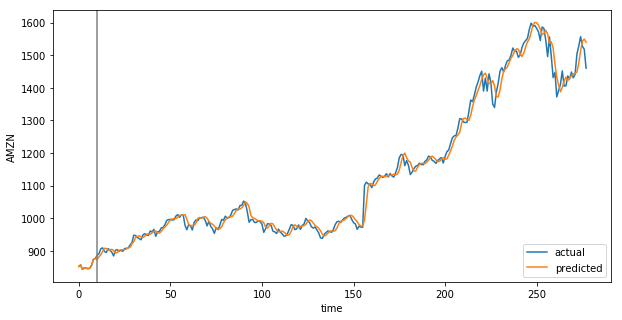

In [754]:
plt.figure(figsize = (10,5))
plt.plot(np.hstack([y_train[:,-10:],y_test]).reshape([-1]), label = 'actual')
plt.plot(np.hstack([y_train[:,-10:],d['y_pred_test']]).reshape([-1]), label = 'predicted')
plt.axvline(x=10, color = 'gray')
plt.xlabel('time')
plt.ylabel('AMZN')
plt.legend()
plt.show()

## Classification problems: When Linear Regression fails

Consider the dataset below that has statistics of preparation time vs. exam success:

   Unnamed: 0   hrs  success
0           0  12.0      1.0
1           1  14.0      1.0
2           2   7.0      0.0
3           3  15.0      1.0
4           4  18.0      1.0


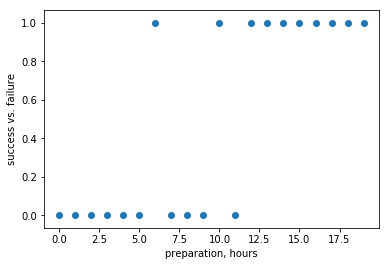

In [810]:
df_prep_success = pd.read_csv('./data/prep_vs_success.csv')
print(df_prep_success.head())
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(df_prep_success.hrs, df_prep_success.success)
ax.set_xlabel('preparation, hours')
ax.set_ylabel('success vs. failure')

In [811]:
# Check and see that the linear regression cannot successfully model this data.
X = np.asarray(df_prep_success.hrs).reshape([1,-1])
y = np.asarray(df_prep_success.success).reshape([1,-1])
d = model(X,y,X,y, num_iterations = 500, learning_rate=0.01, print_cost = False)

Train accuracy: 63.71%
Test accuracy: 63.71%


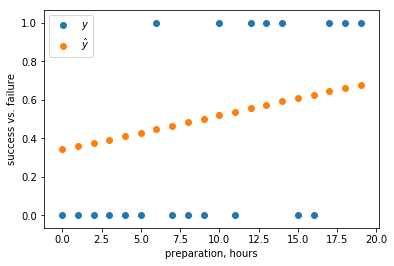

In [771]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(df_prep_success.hrs, df_prep_success.success, label = '$y$')
ax.scatter(X,d['y_pred_train'], label = '$\hat{y}$')
ax.legend()
ax.set_xlabel('preparation, hours')
ax.set_ylabel('success vs. failure')

In [758]:
def logistic_fit(w1, b):
    a = w1*X+b
    y_pred = 1/(1+np.exp(-a))
    
    err = np.abs(y_pred.reshape(-1)-df_prep_success.success) # what are the prediction errors?
    success_count = np.sum(err < 0.5) # let us call errors of less than 0.5 'successes'
   
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.scatter(df_prep_success.hrs, df_prep_success.success, label = '$y$')
    ax.scatter(X,y_pred, label = '$\hat{y}$', alpha = 0.7)
    ax.legend()
    ax.set_xlabel('preparation, hours')
    ax.set_ylabel('success vs. failure')
    
    ax.set_title('No. of successful predictions: %d, %.2f%%'%(success_count,success_count/20.0*100.0))
    ax.legend()
    plt.show()
    
i_plot = interactive(logistic_fit, w1 = (-1,100,0.5), b = (-100.0,10.0,1.0))
i_plot

interactive(children=(FloatSlider(value=49.0, description='w1', min=-1.0, step=0.5), FloatSlider(value=-45.0, …

## The Logistic Regression

### Forward propagation

$z^{(i)} = W^Tx^{(i)}+b$

$\hat{y}^{(i)} = \sigma\left(a^{(i)}\right) = \frac{1}{1+e^{-z^{(i)}}}$

### Loss function

$L(\hat{y}^{(i)}, y^{(i)}) = -y^{(i)} ln\left(\hat{y}^{(i)}\right)-\left(1-y^{(i)}\right)ln\left(1-\hat{y}^{(i)}\right)$

### Cost

$J = \frac{1}{m}\sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)})$

### Backward propagation

$d\hat{y}^{(i)} = \frac{\partial L}{\partial \hat{y}^{(i)}} = \frac{1-y^{(i)}}{1-\hat{y}^{(i)}}-\frac{y^{(i)}}{\hat{y}^{(i)}}$

$dz^{(i)} = \frac{\partial L}{\partial z^{(i)}} = \frac{\partial L}{\partial \hat{y}^{(i)}} \frac{\partial \hat{y}^{(i)}}{\partial z^{(i)}} = d\hat{y}^{(i)} \hat{y}^{(i)} \left(1-\hat{y}^{(i)}\right) = \hat{y}^{(i)} - y^{(i)}$

$dW^{(i)} = \frac{\partial L}{\partial W^{(i)}} = dz^{(i)} x^{(i)}$

$db^{(i)} = dz^{(i)}$

### Update equations

$dW = \frac{1}{m} \sum_{i=1}^{m} dW^{(i)}$

$db = \frac{1}{m} \sum_{i=1}^{m} db^{(i)}$

$W_{t+1} = W_{t} - \alpha dW$

$b_{t+1} = b_{t} - \alpha db$

In [759]:
# Make a synthetic dataset
X, y = make_classification(random_state = 1
                           , n_features = 2 # two features
                           , n_redundant = 0) # no redundant features
X = X.T
y = y.reshape([1,-1])
X.shape,y.shape

((2, 100), (1, 100))

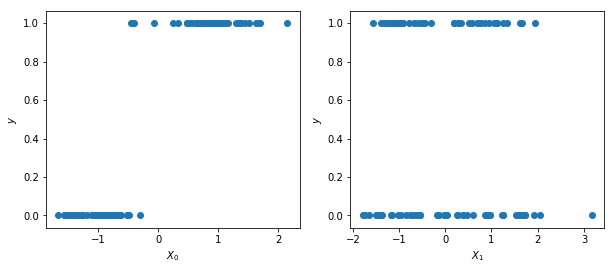

In [760]:
# Let's look at the data first
fig = plt.figure(figsize = (10,4))
ax = plt.subplot(121)
ax.scatter(X[0,:],y)
ax.set_xlabel('$X_0$')
ax.set_ylabel('$y$')
ax = plt.subplot(122)
ax.scatter(X[1,:],y)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$y$')
plt.show()

The code below is built similarly to the code for linear regression:

In [761]:
# Initialize model parameters
def initialize_with_zeros(dim):
    W = np.zeros(shape=(dim,1))
    b = 0
    return W,b

W,b = initialize_with_zeros(20)
print(W.shape,b)

(20, 1) 0


Add the function to implement sigmoid, i.e. nonlinearity:

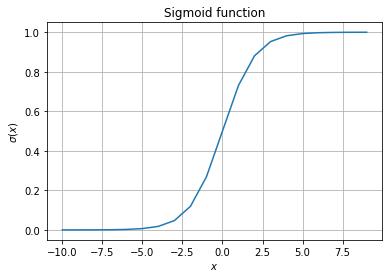

In [762]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10,10,1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,sigmoid(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$\sigma ( x )$')
ax.set_title('Sigmoid function')
ax.grid()
plt.show()

In [763]:
# Forward propagation function
def propagate(W, b, X, y):
    # Forward propagation
    z = np.dot(W.T,X)+b
    y_hat = sigmoid(z)
    losses = (-1)*(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    cost = np.mean(losses)
    
    # Backward propagation
    dz = y_hat-y
    dW = np.mean(dz*X, axis = 1, keepdims = True)
    db = np.mean(dz)
    
    grads = {'dW':dW,'db':db}
    return grads, cost

W,b = initialize_with_zeros(X.shape[0])
grads,cost = propagate(W,b,X,y)
print(grads,cost, grads['dW'].shape)

{'dW': array([[-0.47490836],
       [ 0.06288541]]), 'db': 0.0} 0.69314718056 (2, 1)


In [764]:
# Apply gradient descent to find model parameters 

def optimize(W,b,X,y,num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(W,b,X,y)
        dW, db = grads['dW'], grads['db']
        
        W = W - dW*learning_rate
        b = b - db*learning_rate
        
        costs.append(cost)
        
        if print_cost and i%10 == 0:
            print("Cost after iteration %d: %.2f"%(i,cost))
            
    params = {'W':W,'b':b}
    grads = {'dW':dW,'db':db}
        
    return params, grads, costs

params, grads, costs = optimize(W,b,X,y,num_iterations = 100, learning_rate = 0.1, print_cost = True)


Cost after iteration 0: 0.69
Cost after iteration 10: 0.51
Cost after iteration 20: 0.41
Cost after iteration 30: 0.34
Cost after iteration 40: 0.29
Cost after iteration 50: 0.26
Cost after iteration 60: 0.23
Cost after iteration 70: 0.21
Cost after iteration 80: 0.20
Cost after iteration 90: 0.19


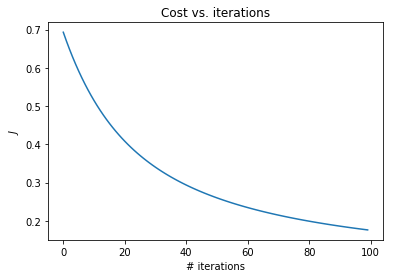

In [765]:
# Let's see how the cost function is decreasing
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(costs)
ax.set_xlabel('# iterations')
ax.set_ylabel('$J$')
ax.set_title('Cost vs. iterations')
plt.show()

In [766]:
# Predict
def predict(W,b,X):
    y_pred = sigmoid(np.dot(W.T,X)+b)
    return y_pred
    
y_pred = predict(params['W'],params['b'],X)
y_pred[0,:5]

array([ 0.94456624,  0.95713689,  0.17973787,  0.22162842,  0.07361483])

In [ ]:
# Logistic regression model

def model(X_train, y_train, X_test, y_test, num_iterations = 100, learning_rate = 0.1, print_cost = False):
    
    num_features = X_train.shape[0]
    W,b = initialize_with_zeros(X_train.shape[0])
    
    params, grads, costs = optimize(W,b,X_train,y_train,num_iterations,learning_rate,print_cost)
    
    W,b = params['W'], params['b']
    
    y_pred_test = predict(W,b,X_test)
    y_pred_train = predict(W,b,X_train)

    print("Train accuracy: %.2f%%" % (100-np.mean(np.abs(y_pred_train-y_train))*100))
    print("Test accuracy: %.2f%%" % (100-np.mean(np.abs(y_pred_test-y_test))*100))
    
    d = {'costs': costs,
        'y_pred_test':y_pred_test,
        'y_pred_train':y_pred_train,
        'W':W, 'b':b,
        'learning_rate':learning_rate,'num_iterations':num_iterations}
    return d
    
X_train, X_test = X[:,:70],X[:,70:] 
y_train, y_test = y[:,:70],y[:,70:] 
d = model(X_train,y_train,X_test,y_test, num_iterations = 1000, learning_rate = 1.0, print_cost = True)

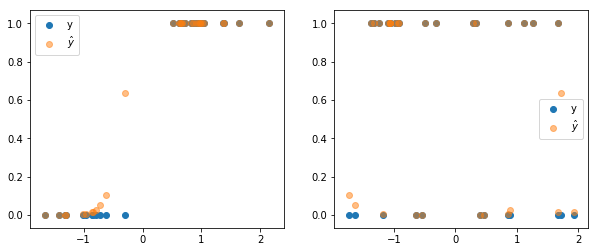

In [768]:
# Let's see how the model is doing on test data
y_pred_test = d['y_pred_test']

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(X_test[0,:],y_test, label = 'y')
ax.scatter(X_test[0,:],y_pred_test, label = '$\hat{y}$',alpha = 0.5)
ax.legend()
ax = fig.add_subplot(1,2,2)
ax.scatter(X_test[1,:],y_test, label = 'y')
ax.scatter(X_test[1,:],y_pred_test, label = '$\hat{y}$', alpha = 0.5)
ax.legend()
plt.show()

In [819]:
X = np.asarray(df_prep_success.hrs).reshape([1,-1])
y = np.asarray(df_prep_success.success).reshape([1,-1])

In [ ]:
# Apply logistic regression to success vs. fail data


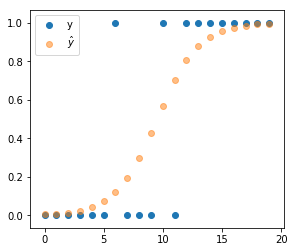

In [821]:
y_pred_test = d['y_pred_test']
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(X[0,:],y, label = 'y')
ax.scatter(X[0,:],y_pred_test, label = '$\hat{y}$',alpha = 0.5)
ax.legend()
plt.show()

## When the logistic regression fails...

Logistic regression model can only model linearly separable classes of data. It is unable to do anything with exclusive OR (XOR): 

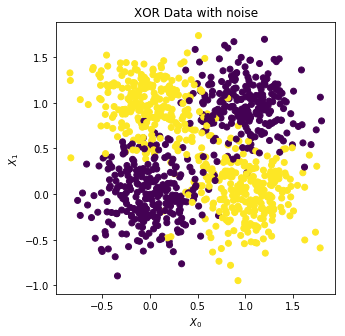

In [722]:
num_points = 1000
num_train = int(num_points*0.1)
noise_std = 0.3
X = np.random.randint(0,2,[2,num_points])
y = np.logical_xor(X[0,:],X[1,:]).reshape([1,-1])
X = X + np.random.normal(0,noise_std,X.shape)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[0,:],X[1,:],c = y)
ax.set_title('XOR Data with noise')
ax.set_xlabel('$X_0$')
ax.set_ylabel('$X_1$')

X_train, y_train = X[:,:num_train], y[:,:num_train]
X_test, y_test = X[:,num_train:], y[:,num_train:]

In [723]:
d = model(X_train,y_train,X_test,y_test, num_iterations = 100, learning_rate = 0.5, 
          print_cost = True)
#print(d['y_pred_test'])

Cost after iteration 0: 0.69
Cost after iteration 10: 0.68
Cost after iteration 20: 0.68
Cost after iteration 30: 0.68
Cost after iteration 40: 0.67
Cost after iteration 50: 0.67
Cost after iteration 60: 0.67
Cost after iteration 70: 0.67
Cost after iteration 80: 0.67
Cost after iteration 90: 0.67
Train accuracy: 51.96%
Test accuracy: 50.15%


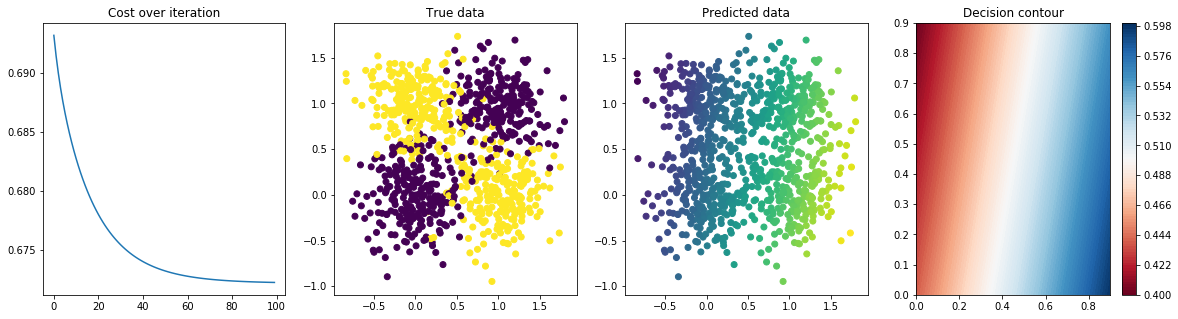

In [724]:

# Let's see how the cost function is decreasing
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,4,1)
ax.plot(d['costs'])
ax.set_title('Cost over iteration')

ax = fig.add_subplot(1,4,2)
ax.scatter(X_test[0,:],X_test[1,:],c = y_test)
ax.set_title('True data')

ax = fig.add_subplot(1,4,3)
ax.scatter(X_test[0,:],X_test[1,:],c = d['y_pred_test'])
ax.set_title('Predicted data')

x1, x2 = np.mgrid[0:1:0.1, 0:1:0.1]
X_sim = np.c_[x1.ravel(),x2.ravel()].T
y_contour = predict(d['W'],d['b'],X_sim).reshape(x1.shape[0],-1)

ax = fig.add_subplot(1,4,4)
c = ax.contourf(x1,x2,y_contour,100,cmap='RdBu')
ax.set_title('Decision contour')
fig.colorbar(c)

plt.show()

The logic function above can only be modelled by a combination of two (or more) logistic regressions, which is a topic of the following notebook (artificial neural networks)

# Conclusion

The code and formulae above explain how the algorithms find the best model parameters. If you do not need anything of the above, you can just use already implemented linear and logistic regressions:

```python
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# logistic regression
logr = LinearRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
```